In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [59]:
dataset = pd.read_csv('IBM Attrition Data.csv')
dataset.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [34]:
dataset.shape

(1470, 13)

In [28]:
dataset.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [3]:
#find the age distribution of employees in IBM
dataset.groupby('Age').describe()

DistanceFromHome                                                      \
               count       mean        std  min   25%   50%    75%   max   
Age                                                                        
18               8.0   6.125000   4.290771  1.0  3.00   5.0   8.50  14.0   
19               9.0  10.555556   9.658042  1.0  2.00   9.0  21.00  25.0   
20              11.0   7.090909   5.838742  1.0  2.50   6.0   9.50  21.0   
21              13.0   9.076923   6.435080  1.0  5.00   9.0  12.00  22.0   
22              16.0   8.437500   7.201562  1.0  3.00   6.5  12.00  26.0   
23              14.0   9.142857   6.780710  1.0  4.50   8.5  10.00  26.0   
24              26.0  11.884615   8.496244  1.0  4.00  10.0  17.75  29.0   
25              26.0   8.769231   8.353719  1.0  2.25   5.0  12.25  28.0   
26              39.0  10.230769   9.683033  1.0  2.00   6.0  18.50  29.0   
27              48.0   7.500000   6.045924  1.0  2.00   6.0  10.00  23.0   
28              48.0   8.875000   8.539333  1.0  2.00   5.5  15.25  29.0   
29              68.0  10.808824   8.749000  1.0  2.00   9.0  18.25  29.0   
30              60.0   9.850000   8.576327  1.0  2.75   7.0  16.00  29.0   
31              69.0   9.260870   7.931049  1.0  2.00   7.0  12.00  29.0   
32              61.0   7.278689   7.176655  1.0  2.00   5.0   9.00  29.0   
33              58.0   8.793103   7.672596  1.0  2.25   7.0  13.75  29.0   
34              77.0   8.909091   7.805500  1.0  2.00   7.0  13.00  29.0   
35              78.0  11.333333   8.791476  1.0  3.00   9.0  18.00  28.0   
36              69.0   8.246377   6.442976  1.0  3.00   7.0  11.00  27.0   
37              50.0   8.480000   6.618589  1.0  3.00   8.5  10.75  25.0   
38              58.0   7.724138   7.902460  1.0  2.00   5.0  10.00  29.0   
39              42.0   9.333333   7.885357  1.0  2.25   6.5  14.50  25.0   
40              57.0   9.385965   8.160782  1.0  2.00   8.0  14.00  28.0   
41              40.0   8.050000   6.567012  1.0  3.75   6.5  10.00  28.0   
42              46.0  10.782609   9.349778  1.0  2.00   8.0  17.75  29.0   
43              32.0  11.406250   8.222155  1.0  6.00   9.0  15.25  28.0   
44              33.0   9.030303   9.481841  1.0  1.00   5.0  15.00  29.0   
45              41.0  11.097561  10.012005  1.0  2.00   7.0  20.00  29.0   
46              33.0   6.545455   6.614808  1.0  2.00   3.0   9.00  26.0   
47              24.0   9.125000   9.303167  1.0  2.00   4.0  14.00  29.0   
48              19.0   8.105263   8.352609  1.0  2.00   4.0  12.50  29.0   
49              24.0  10.083333   8.037503  1.0  3.75   8.0  16.50  28.0   
50              30.0   9.833333   9.829875  1.0  2.00   7.5  15.75  29.0   
51              19.0   7.684211   6.633690  1.0  3.00   6.0   9.00  26.0   
52              18.0   9.111111   9.467523  1.0  2.25   5.5  10.25  29.0   
53              19.0   7.631579   7.754644  1.0  2.00   6.0   7.50  24.0   
54              18.0  10.277778   8.180361  1.0  3.00   8.5  18.50  26.0   
55              22.0   8.909091   8.949111  1.0  2.00   3.0  17.00  26.0   
56              14.0   9.428571   6.902779  1.0  6.25   8.0  10.50  24.0   
57               4.0  13.750000  14.863266  1.0  1.00  12.5  25.25  29.0   
58              14.0   8.785714   8.395773  1.0  2.00   6.0  13.75  23.0   
59              10.0   6.400000   8.248906  1.0  2.00   3.0   5.25  25.0   
60               5.0  11.800000  10.521407  1.0  7.00   7.0  16.00  28.0   

    Education            ... WorkLifeBalance      YearsAtCompany             \
        count      mean  ...             75%  max          count       mean   
Age                      ...                                                  
18        8.0  2.500000  ...            3.25  4.0            8.0   0.000000   
19        9.0  2.111111  ...            4.00  4.0            9.0   0.777778   
20       11.0  2.636364  ...            3.00  4.0           11.0   1.545455   
21       13.0  1.615385  ...     

In [4]:
dataset.groupby('Age').count()

,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,,,,,,,,,,,,
18,8,8,8,8,8,8,8,8,8,8,8,8
19,9,9,9,9,9,9,9,9,9,9,9,9
20,11,11,11,11,11,11,11,11,11,11,11,11
21,13,13,13,13,13,13,13,13,13,13,13,13
22,16,16,16,16,16,16,16,16,16,16,16,16
23,14,14,14,14,14,14,14,14,14,14,14,14
24,26,26,26,26,26,26,26,26,26,26,26,26
25,26,26,26,26,26,26,26,26,26,26,26,26
26,39,39,39,39,39,39,39,39,39,39,39,39


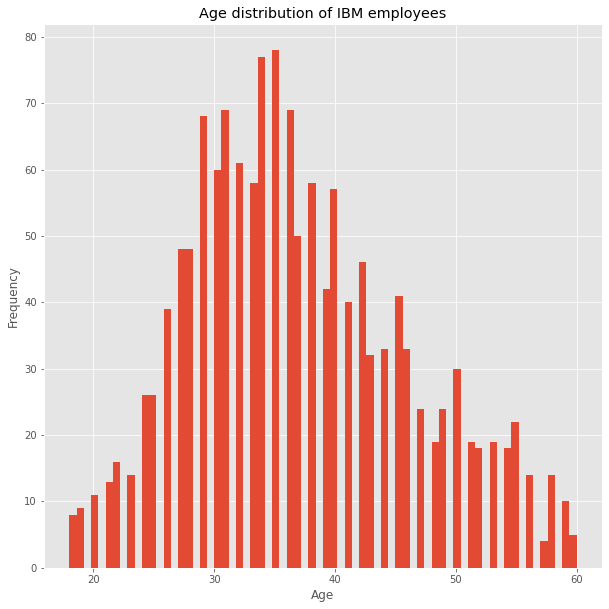

In [23]:
#visualize age distribution using histogram
style.use('ggplot')
plt.figure(figsize=(10,10))
plt.hist(dataset.Age, bins=70)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution of IBM employees')
plt.show()

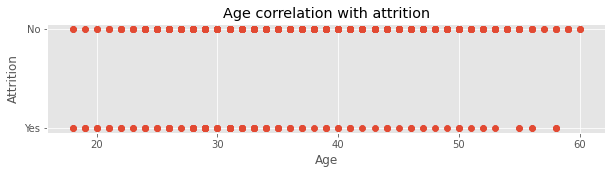

In [12]:
#graph age and attrition
style.use('ggplot')
plt.figure(figsize=(10,2))
plt.scatter(dataset.Age, dataset.Attrition)
plt.xlabel('Age')
plt.ylabel('Attrition')
plt.title('Age correlation with attrition')
plt.show()

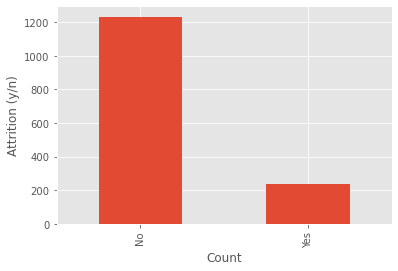

In [25]:
#view distribution of attrition
style.use('ggplot')
dataset.Attrition.value_counts().plot(kind='bar')
plt.ylabel('Attrition (y/n)')
plt.xlabel('Count')
plt.show()

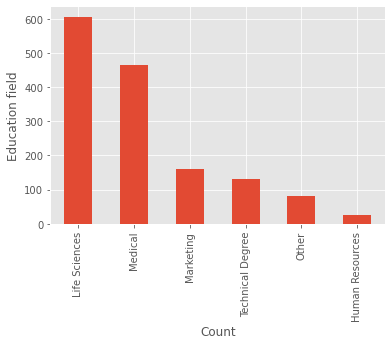

In [26]:
#view distribution of education field
style.use('ggplot')
dataset.EducationField.value_counts().plot(kind='bar')
plt.ylabel('Education field')
plt.xlabel('Count')
plt.show()

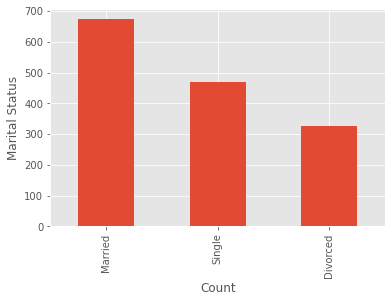

In [27]:
#view distribution of marital status
style.use('ggplot')
dataset.MaritalStatus.value_counts().plot(kind='bar')
plt.ylabel('Marital Status')
plt.xlabel('Count')
plt.show()

In [38]:
#format categorical data
dataset.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [60]:
dataset.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [61]:
dataset.Department.replace('Research & Development', 1, inplace=True)
dataset.Department.replace('Sales', 2, inplace=True)
dataset.Department.replace('Human Resources', 3, inplace=True)
dataset.Department.value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [62]:
dataset.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [63]:
dataset.EducationField.replace('Life Sciences', 1, inplace=True)
dataset.EducationField.replace('Medical', 2, inplace=True)
dataset.EducationField.replace('Marketing', 3, inplace=True)
dataset.EducationField.replace('Technical Degree', 4, inplace=True)
dataset.EducationField.replace('Other', 5, inplace=True)
dataset.EducationField.replace('Human Resources', 6, inplace=True)
dataset.EducationField.value_counts()

1    606
2    464
3    159
4    132
5     82
6     27
Name: EducationField, dtype: int64

In [64]:
dataset.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [65]:
dataset.MaritalStatus.replace('Married', 1, inplace=True)
dataset.MaritalStatus.replace('Single', 2, inplace=True)
dataset.MaritalStatus.replace('Divorced', 3, inplace=True)
dataset.MaritalStatus.value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [70]:
dataset.Attrition.replace('No', 1, inplace=True)
dataset.Attrition.replace('Yes', 2, inplace=True)

In [73]:
dataset.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [79]:
#split into train and test data
train, test = train_test_split(dataset)
train.shape, test.shape

((1102, 13), (368, 13))

In [80]:
x_train = train.drop('Attrition', axis=1)
y_train = train['Attrition']
x_test = test.drop('Attrition', axis=1)
y_test = test['Attrition']
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1102, 12), (1102,), (368, 12), (368,))

In [89]:
#create our model
log_reg = LogisticRegression().fit(x_train, y_train)

C:\Users\akula\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
#predict using test data
pred_y = log_reg.predict(x_test)
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [92]:
#check accuracy of model
from sklearn import metrics
metrics.accuracy_score(y_test, pred_y)

0.8478260869565217

In [104]:
#for curiousity -- running all the data into a separate model
x2 = dataset.drop('Attrition', axis=1)
y2 = dataset.Attrition
log_reg2 = LogisticRegression().fit(x2, y2)
pred_y2 = log_reg2.predict(x2)

import collections
collections.Counter(pred_y2)

C:\Users\akula\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Counter({1: 1466, 2: 4})